<a href="https://colab.research.google.com/github/rajeshchengannur/DeepLearning/blob/main/DL102_MPNeuron_And_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Macullah Pitts Neuron
Mucullah was a neuro scientist and Pitts was a statistician
Dendrite (Inputs)-->  Soma (Processing unit) --> Synapse (Strength of the Nuerons, we can say weights) -->axon (Output to other neurons)

Data --> Task --Model -->Loss -->Larning Algorithm -->Evaluation

A model is a true relationship between Y and X  ie y= f(x)
what the parameters are,what kind of input the function takes and what the output it gives.

The input in MP neuron all the inputs are boolean and output also boolean

Loss = True output - Predicted Output ($y-\hat{y})$ The darw back with this is the positive values cancell out with the negative values. 
To avoid this losss =($y-\hat{y})^2$



In [4]:
import sklearn.datasets
import numpy as np

#Load Data

In [5]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [6]:
X=breast_cancer.data
Y=breast_cancer.target

In [7]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [8]:
import pandas as pd
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [9]:
data['class'] = breast_cancer.target

In [10]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [12]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [13]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Train Test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=data.drop('class',axis=1)
Y=data['class']

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [20]:
print(Y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.5263157894736842 0.638671875


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y) # stratify splits the data in an equal way as mean will not change much
#Split maintains the ration of malignant and benign

In [22]:
print(Y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.631578947368421 0.626953125


In [23]:
#We can verify the data by taking the mean of individual features as well
print(X.mean(),X_train.mean(),X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [24]:
# When we re-run the split , there is a possibility that the value will change and will affect the modal. So to avoid this, We should keep the dataaset unchanged.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1) # How many times we re-run the dataset will not change

#Binarisation
We have learned that MP Neurons supports only binary data for both input and output. So we need to binarise the input data

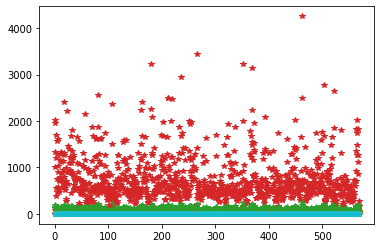

In [25]:
#Just analyze the data
import matplotlib.pyplot as plt
plt.plot(X_train,'*')
plt.show()

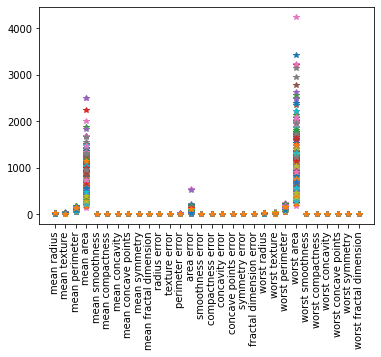

In [26]:
# Seems very difficult to read the data, Let's try with the transpose of the data
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical') # To avoaid overlapping of the labels
plt.show()

In [27]:
# We can binarise data using mean, median or any other ways. But now for simplicity, for mean area, the values above 1000 is mapped to and and 0 for less than 1000
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x<1000 else 1)

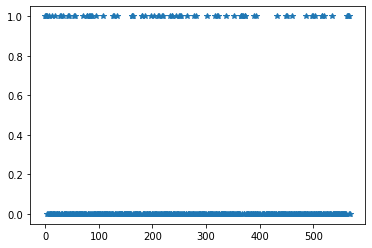

In [28]:
plt.plot(X_binarised_3_train,'*') # This data is binarised

In [29]:
# Binarising each and every features is difficult. will use pandas cut frame work to do this
X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[0,1])

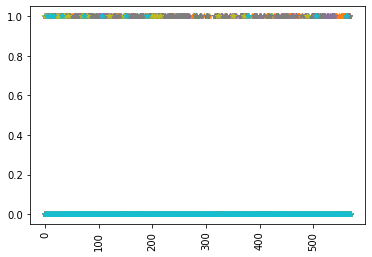

In [30]:
plt.plot(X_binarised_train,'*')
plt.xticks(rotation='vertical') # To avoaid overlapping of the labels
plt.show()

In [31]:
# Do the same for test data 
X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[0,1])

In [32]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [33]:
# Now we hav eto convert the pandas data frame to numpy arrays 
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [34]:
type(X_binarised_test)

numpy.ndarray

#MP Neuron Model
Model of the MP Neuron is a single parameter , ie, b
we sum up all the binarised values and it exceeds b then it's Malignant else benign ( x1+ x2..+b >=0)

In [35]:
from random import randint

In [36]:
# Our goal is to find the value of b such that we will get maximum accuracy. 
# Just do a simpe case to understand this take b=3

b=3
i =randint(0,X_binarised_train.shape[0])
print ('for row',i)
if(np.sum(X_binarised_train[i,:])>b):
  print('MP Neuron inference is Malignat')
else :
  print('MP Neuron inference is Benign')

if(Y_train[i]==1):
  print('MP Neuron inference is Malignat')
else :
  print('MP Neuron inference is Benign')

for row 378
MP Neuron inference is Benign
MP Neuron inference is Malignat


In [37]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarised_train,Y_train):
    Y_pred=(np.sum(x)>=b)
    Y_pred_train.append(Y_pred)
    accurate_rows += (y==Y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.240234375
2 0.185546875
3 0.150390625
4 0.154296875
5 0.181640625
6 0.21484375
7 0.244140625
8 0.275390625
9 0.298828125
10 0.3125
11 0.328125
12 0.3359375
13 0.34375
14 0.3515625
15 0.357421875
16 0.3671875
17 0.369140625
18 0.373046875
19 0.373046875
20 0.373046875
21 0.373046875
22 0.373046875
23 0.373046875
24 0.373046875
25 0.373046875
26 0.373046875
27 0.373046875
28 0.373046875
29 0.373046875
30 0.373046875


In [38]:
# This seems that , we are getting 62% accuracy while b=0. when you group the data, it is evident that all the features are higher for class 0 and less for class 1.
#Means, The binarization label we used is wrong that's why we are not getting proper accuracy.
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [39]:
X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[1,0])
X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[1,0])
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [40]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarised_train,Y_train):
    Y_pred=(np.sum(x)>=b)
    Y_pred_train.append(Y_pred)
    accurate_rows += (y==Y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [41]:
# for 28, we get much higher accuracy
#Now we are validating with test data for b=28
from sklearn.metrics import accuracy_score

In [42]:
b =28
Y_pred_test=[]
for x in X_binarised_test :
    y_pred = (np.sum(x) >= b)
    Y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_pred_test, Y_test) 
print (b, accuracy)

28 0.7894736842105263


#MP Neuron Class

In [43]:
class MPNeuron:
  def __init__(self):
    self.b = None
  def model(self,x):
    return(sum(x) >=self.b)
  def predict(self,X):
    Y =[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return (np.array(Y))
  def fit(self,X,Y):
    accuracy ={}
    for b in range(X.shape[1]+1):
      self.b =b
      Y_pred =self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)
    best_b =max(accuracy,key=accuracy.get)
    self.b = best_b

    print('Optimal value of b is :',best_b)
    print('Highest Accuracy is :',accuracy[best_b])

In [44]:
mpneuron = MPNeuron()
mpneuron.fit(X_binarised_train,Y_train)


Optimal value of b is : 28
Highest Accuracy is : 0.849609375


In [45]:
#Verify the same for test data
Y_test_pred = mpneuron.predict(X_binarised_test)
accuracy_test=accuracy_score(Y_test_pred,Y_test)

In [46]:
print(accuracy_test)

0.7894736842105263


#Perceptron
$y=1,\mbox{if}\sum_i w_i x_i >=b$

$y=0,\mbox{otherwise}$

In [51]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b =None
    
  def model(self,x) :
    return 1 if (np.dot(self.w,x)>= self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)


  """def fit(self,X,Y):
    self.w =np.ones(X.shape[1])
    self.b =0
    for x,y in zip(X,Y):
      y_pred = self.model(x)
      if y==1 and y_pred ==0:
        self.w = self.w+x
        self.b = self.b +1
      elif y==0 and y_pred ==1:
        self.w = self.w -x
        self.b = self.b -1
"""
#Introducing the second hyper parameter
  def fit(self,X,Y,epochs =1,lr=1):
    self.w =np.ones(X.shape[1])
    self.b =0
    accuracy = {}
    max_accuracy =0
    wt_matrix =[]
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y==1 and y_pred ==0:
          self.w = self.w+x*lr
          self.b = self.b +1*lr
        elif y==0 and y_pred ==1:
          self.w = self.w -x*lr
          self.b = self.b -1*lr
        wt_matrix.append(self.w)
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if (accuracy[i] > max_accuracy) :
        max_accuracy = accuracy[i]
        chkptw =self.w
        chkptb = self.b
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()
    return np.array(wt_matrix)

  """  def fit(self,X,Y,epochs =1):
    self.w =np.ones(X.shape[1])
    self.b =0
    accuracy = {}
    max_accuracy =0
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y==1 and y_pred ==0:
          self.w = self.w+x
          self.b = self.b +1
        elif y==0 and y_pred ==1:
          self.w = self.w -x
          self.b = self.b -1
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if (accuracy[i] > max_accuracy) :
        max_accuracy = accuracy[i]
        chkptw =self.w
        chkptb = self.b
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.show()
"""


In [52]:
perceptron = Perceptron()

In [49]:
type(X_train)
X_train = X_train.values


0.373046875


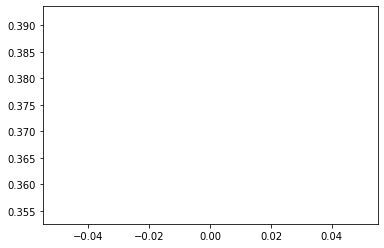

In [48]:
perceptron.fit(X_train,Y_train)

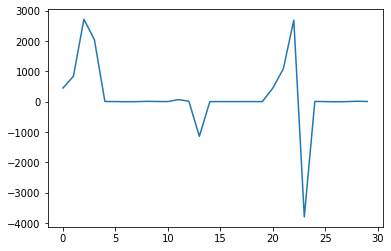

In [49]:
plt.plot(perceptron.w)
plt.show()

In [50]:
#Lets predict the accuracy and see
Y_pred_train =perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.373046875


In [51]:
# The accuracy is almost same for both train and test data. But its very low. How to rectify the problem

#Here we introduce epochs, Insted of changing the values of w and b every time , we itereate through multiple times to calculate the value. 
# Here I am commenting the  fit method and introduce the same method with epoch.

0.921875


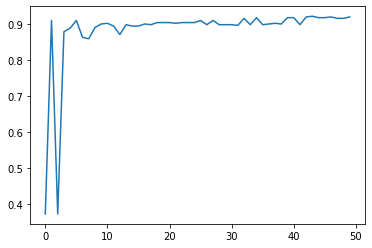

In [52]:
perceptron.fit(X_train,Y_train,50)
#No of epochs also decides model. so this is called hyper parameter.


In [54]:
#Lets predict the accuracy and see. 
This is check pointing. Keep tract of best possible value of the model.
Y_pred_train =perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.921875


In [ ]:
#Let's tune the model with one more hyper parameter other than epoch.
# In the learning algothem, we are adding self.w = self.w+x, self.b = self.b +1 , do something like small value 

0.947265625


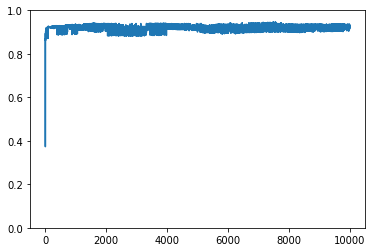

In [95]:
perceptron.fit(X_train,Y_train,10000,0.001)
# Depends on the memory, we can check the accuracy change for hyperparameter by incresing or decresing the values of epochs and lr

In [92]:
X_test = X_test.values

In [96]:
#Lets test the accuracy for test data
Y_pred_test =perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9473684210526315


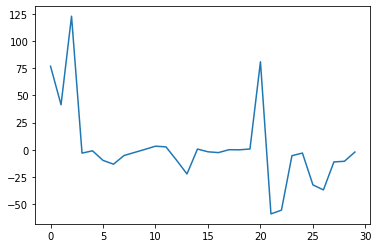

In [97]:
plt.plot(perceptron.w)
plt.show()

#Embedding Matplotlib animations in Jupyter notebood

In [53]:
%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

0.927734375


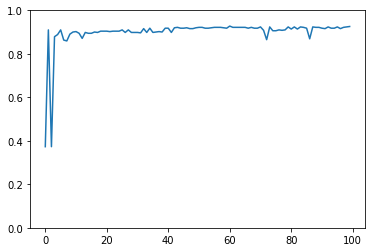

In [63]:
#We are planning to plot the weights. Sot it's to be stored in the function. We are declaring a variable wt_matrix and storing the values
wt_matrix= perceptron.fit(X_train,Y_train,100)

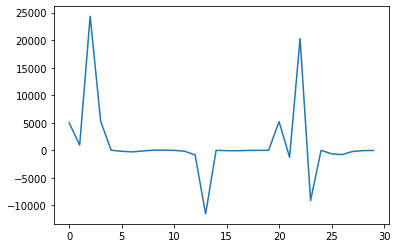

In [55]:
#Just plot the value to see the max value of y axis, Plot the last value of the Y axis
plt.plot(wt_matrix[-1,:])
plt.show()

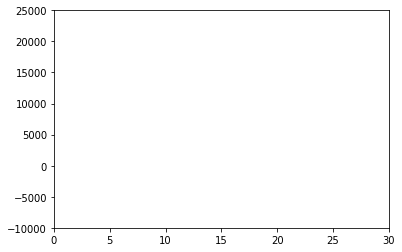

In [64]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-10000, 25000))

line, = ax.plot([], [], lw=2)

In [65]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)


In [66]:
    # call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 
                               frames=100, interval=20, blit=True)


In [67]:
HTML(anim.to_html5_video())

In [1]:
print(7+6**5/3)

2599.0
